# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

In [5]:
from scipy.stats import uniform

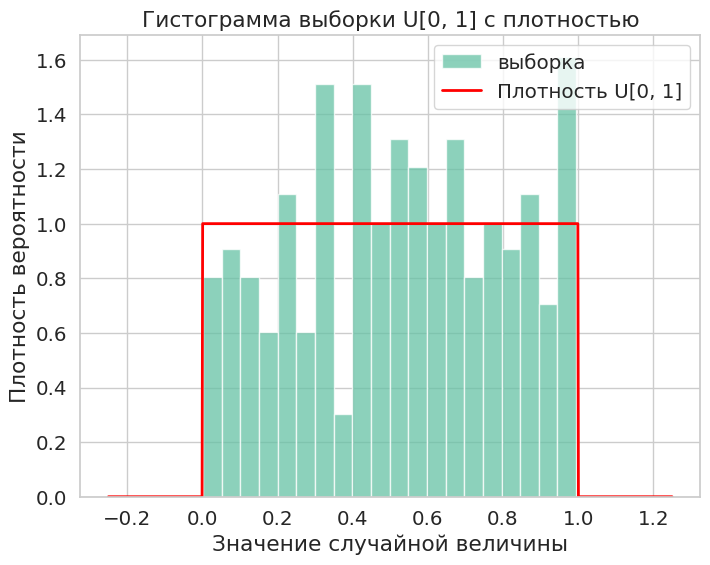

In [29]:


# Задаем количество случайных величин
uniform_sample_size = 200

# Генерируем 200 независимых случайных величин из U[-0.25, 1.25]
data_uniform = np.random.uniform(0, 1, uniform_sample_size)


# Построение гистограммы
plt.figure(figsize=(8, 6))
plt.hist(data_uniform, bins=20, density=True, alpha=0.75, label='выборка')

# Построение графика плотности
x = np.linspace(-0.25, 1.25, 1000)  # точки для построения графика плотности
density = np.ones_like(x)  # плотность распределения U[0, 1] равна 1 на [0, 1]
density[(x < 0) | (x > 1)] = 0  # плотность вне [0, 1] равна 0
plt.plot(x, density, label='Плотность U[0, 1]', color='red', linewidth=2)

plt.title('Гистограмма выборки U[0, 1] с плотностью')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)

plt.show()


Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

In [22]:
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs

In [23]:
def uniform(size=1, precision=30):
    """
    Функция генерации случайных величин из равномерного
    распределения на отрезке [0,1] с заданной точностью. 
    """
    product = np.prod(size)
    coin_precision = coin(precision*product) # генерируем броски монетки
    if type(size) == int:
        conv_tup = [size, precision]
    else:
        conv_tup = np.array(size).astype(int)
        conv_tup = np.insert (conv_tup, len(conv_tup), precision)
    coin_precision_spl = coin_precision.reshape(conv_tup)
    # переводим двоичное число из ячеек вдоль оси от precision в десятичное
    y = (coin_precision_spl*np.power(2, np.arange(precision-1,-1,-1))).sum(axis=-1)
    # т.к. надо переводить не 101..., а 0.101... в десятичное:
    y_answ = y / (np.power(2,precision))
    return y_answ

def plot_uniform_different_precision(size=100):
    """
    Функция построения графиков с использованием точек из uniform для разных precision. 
    """
    # определите график размера 15 на 3
    plt.figure(figsize=(15, 3))
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        # plt.<определите подграфик>(3, 2, i + 1)
        plt.subplot(3, 2, i+1)

        plt.scatter(uniform(size=size, precision=precision), np.zeros(size), alpha=0.4)
        plt.suptitle("Значения случайных величин в зависимости от precision для U[0,1]")

        plt.yticks([])
        if i < 4:
            plt.xticks([])
    return plt.gcf()


Figure(1500x300)


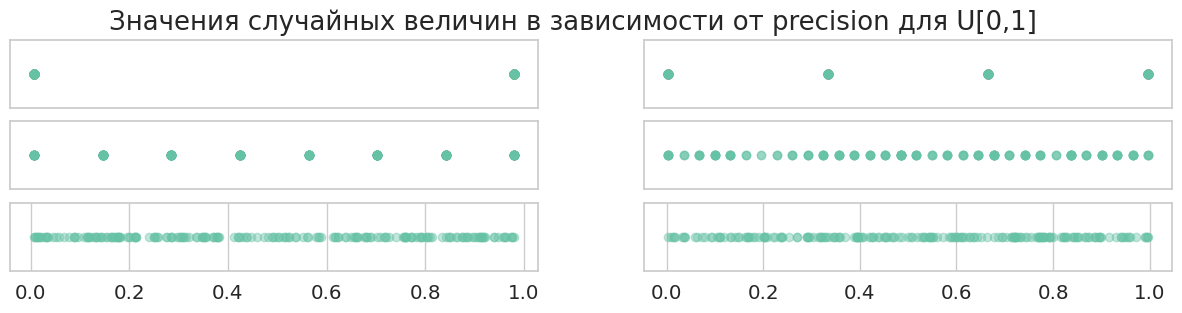

In [28]:
print(plot_uniform_different_precision(size=200))

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

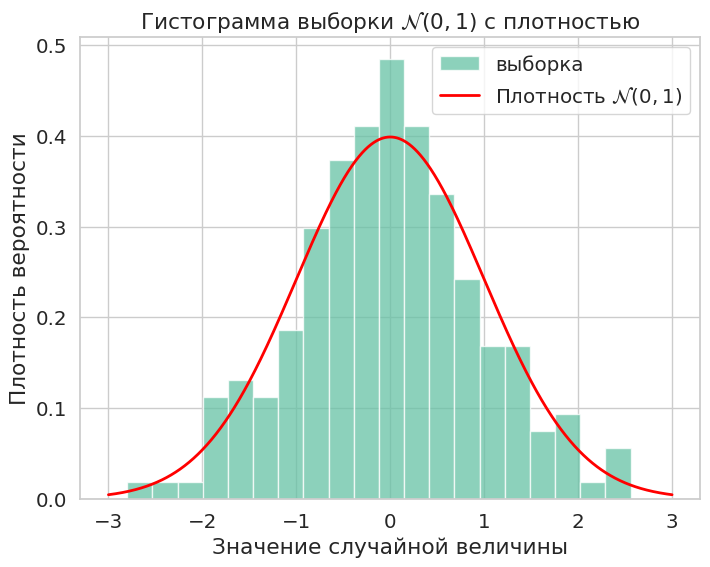

In [32]:
# Генерируем 200 независимых случайных величин из стандартного нормального распределения
data_normal = np.random.normal(0, 1, 200)


# Построение гистограммы
plt.figure(figsize=(8, 6))
plt.hist(data_normal, bins=20, density=True, alpha=0.75, label='выборка')

# Построение графика плотности
x = np.linspace(-3, 3, 1000)
density_normal = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)  # плотность стандартного нормального распределения
plt.plot(x, density_normal, label='Плотность $\mathcal{N}(0, 1)$', color='red', linewidth=2)

plt.title('Гистограмма выборки $\mathcal{N}(0, 1)$ с плотностью')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)

plt.show()

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

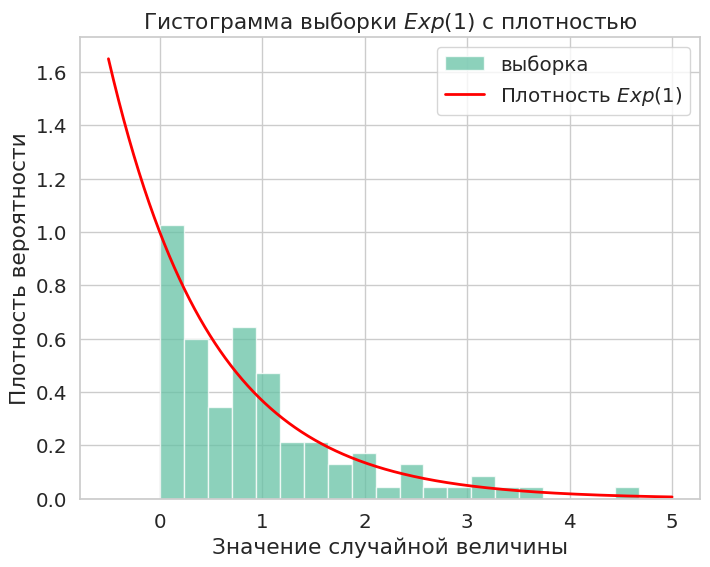

In [38]:
# Генерируем выборку из экспоненциального распределения Exp(1) размера 100
data_exponential = np.random.exponential(scale=1, size=100)

# Построение гистограммы
plt.figure(figsize=(8, 6))
plt.hist(data_exponential, bins=20, density=True, alpha=0.75, label='выборка')

# Построение графика плотности
x = np.linspace(-0.5, 5, 1000)
density_exponential = np.exp(-x)  # плотность экспоненциального распределения Exp(1) для x >= 0
plt.plot(x, density_exponential, label='Плотность $Exp(1)$', color='red', linewidth=2)

plt.title('Гистограмма выборки $Exp(1)$ с плотностью')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)

plt.show()

**Выводы:**

Благодаря данной части задания, можно убедиться что функции для генерации случайных величин из библиотеки numpy справляется хорошо. Почти все величины совпадают со своей плотностью (теоретическая)

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

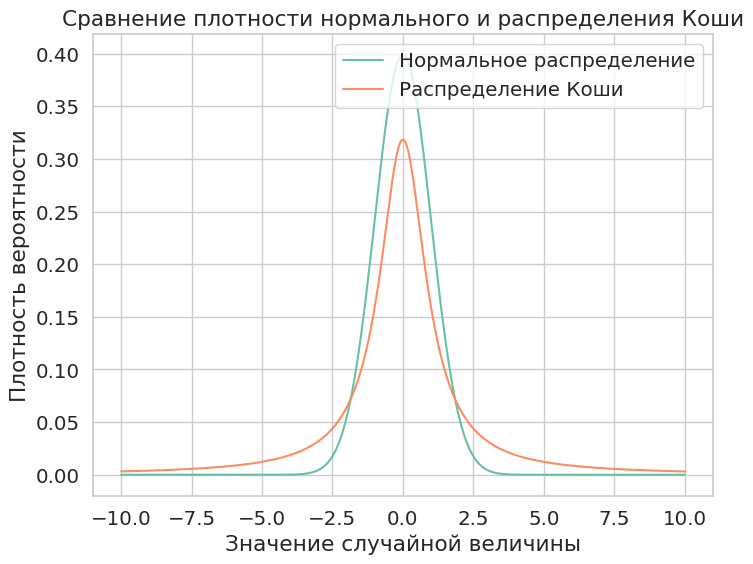

In [39]:
from scipy.stats import norm, cauchy

# Задаем параметры для нормального распределения
mu = 0
sigma = 1

# Задаем диапазон значений x для отображения плотности
x = np.linspace(-10, 10, 1000)

# Вычисляем плотность нормального распределения
normal_density = norm.pdf(x, loc=mu, scale=sigma)

# Вычисляем плотность распределения Коши
cauchy_density = cauchy.pdf(x)

# Строим график плотностей
plt.figure(figsize=(8, 6))
plt.plot(x, normal_density, label='Нормальное распределение')
plt.plot(x, cauchy_density, label='Распределение Коши')
plt.title('Сравнение плотности нормального и распределения Коши')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)

plt.show()

Плотность нормального распределения быстро убывает при удалении от среднего значения (где $\mu = 0$), образуя колоколообразную форму.
Плотность распределения Коши убывает гораздо медленнее при удалении от нуля, по сравнению с нормальным распределением. В добавок нормальное распределение имеет ограниченные хвосты и быстро убывает, в то время как распределение Коши имеет тяжелые хвосты и медленно убывает

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

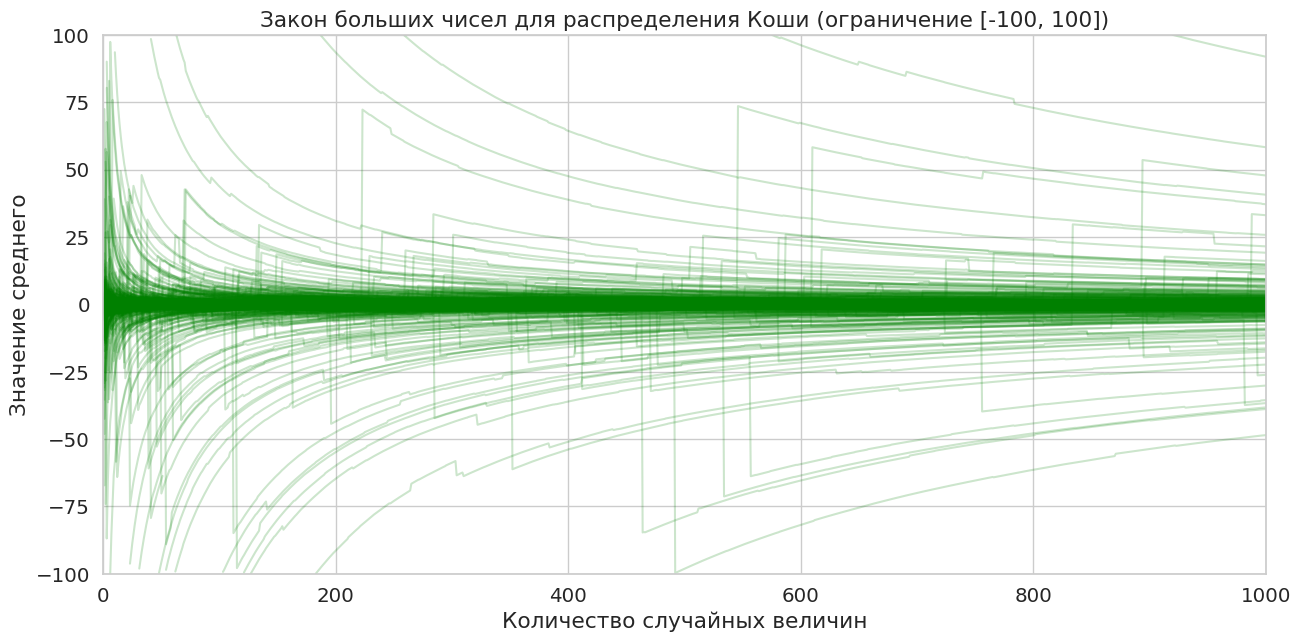

In [42]:
# Задаем параметры эксперимента
size = 1000  # количество случайных величин в каждой выборке
samples_count = 500  # количество выборок

# Генерируем выборки из распределения Коши
samples = sps.cauchy().rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

# Ограничиваем значения среднего только для интервала (-100, 100)
filtered_cum_means = np.where(np.logical_and(cum_means > -100, cum_means < 100), cum_means, np.nan)

# Строим график для каждой выборки отдельно
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, filtered_cum_means[i], color="green", alpha=0.2)  # alpha для прозрачности

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.title("Закон больших чисел для распределения Коши (ограничение [-100, 100])")
plt.xlim((0, size))
plt.ylim((-100, 100))  # Ограничиваем ось y
plt.grid(True)
plt.show()

Для распределения Коши не выполняется закон больших чисел. Скорее всего это связано с тем что для распределения Коши не существует мат ожидание. Так же может это связано ещё с тем, что его плотность вероятности убывает медленно и не ограничена на всей числовой прямой.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

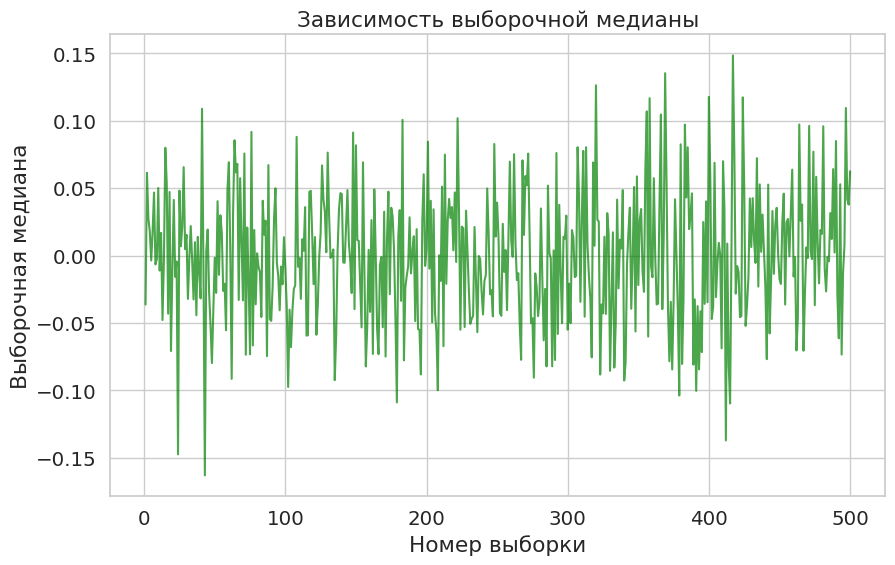

In [47]:
#samples = sps.cauchy().rvs(size=(samples_count, size))
# Вычисляем выборочную медиану для каждой выборки
sample_medians = np.median(samples, axis=1)

# Строим график зависимости выборочной медианы от размера выборки
plt.figure(figsize=(10, 6))
plt.plot(range(1, samples_count + 1), sample_medians, color='green', alpha=0.7)

plt.xlabel('Номер выборки')
plt.ylabel('Выборочная медиана')
plt.title('Зависимость выборочной медианы')
plt.grid(True)
plt.show()

**Вывод:**

Данная часть эксперимента показала, что распределение Коши ведёт себя очень интересно с точки зрения теории вероятности и мат статов. Она не подчиняется ни ЗБЧ, выборочная медиана для распределения Коши не сходится к какому-либо стабильному значению, отсутствует конечный мат ожидание.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Минимальный размер выборки n для достижения F(n) <= 0.02: 366


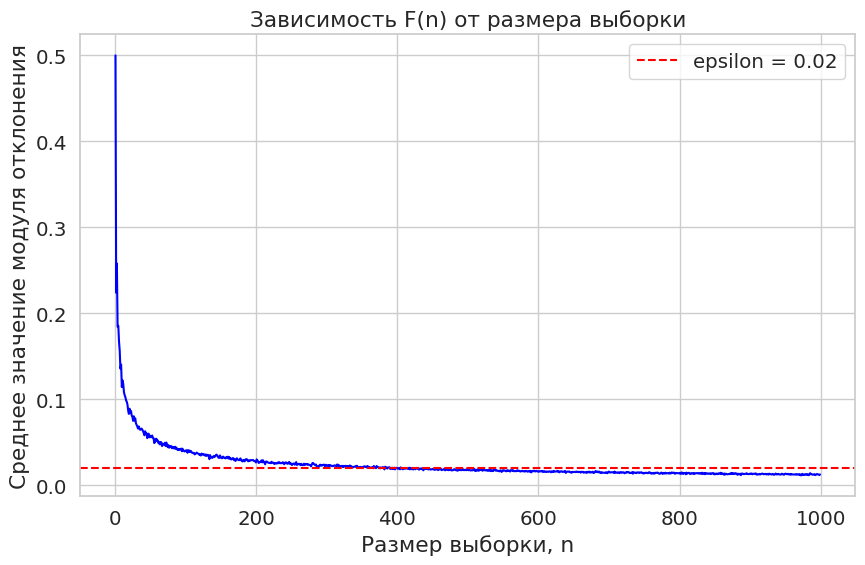

In [53]:
# Параметры эксперимента
K = 500  # количество выборок
a = 0.5  # истинное значение параметра распределения Bernoulli
epsilon = 0.02  # допустимое отклонение от среднего

# Функция для расчета F(n)
def calculate_F(n, K, a):
    # Генерируем K выборок размера n из распределения Bernoulli(a)
    samples = np.random.binomial(1, a, size=(K, n))
    # Вычисляем выборочные средние для каждой выборки
    sample_means = samples.mean(axis=1)
    # Вычисляем модуль отклонения от истинного среднего a
    deviations = np.abs(sample_means - a)
    # Вычисляем среднее значение модуля отклонения
    mean_deviation = deviations.mean()
    return mean_deviation

# Определяем возможные значения размера выборки n
n_values = np.arange(1, 1000)  # Пример: ищем минимальный n до 1000

# Вычисляем значения F(n) для всех размеров выборки n
F_values = np.array([calculate_F(n_val, K, a) for n_val in n_values])

# Находим минимальное значение n, при котором F(n) <= epsilon
min_n_index = np.argmax(F_values <= epsilon) + 1  # +1, чтобы получить фактический размер выборки

if min_n_index == len(n_values) + 1:
    # Если не удалось найти подходящий размер выборки до максимального значения
    min_n = None
else:
    min_n = min_n_index

print(f"Минимальный размер выборки n для достижения F(n) <= {epsilon}: {min_n}")

# Построение графика зависимости F(n) от n
plt.figure(figsize=(10, 6))
plt.plot(n_values, F_values, color='blue')
plt.axhline(epsilon, color='red', linestyle='--', label=f'epsilon = {epsilon}')
plt.xlabel('Размер выборки, n')
plt.ylabel('Среднее значение модуля отклонения')
plt.title('Зависимость F(n) от размера выборки')
plt.legend()
plt.grid(True)
plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

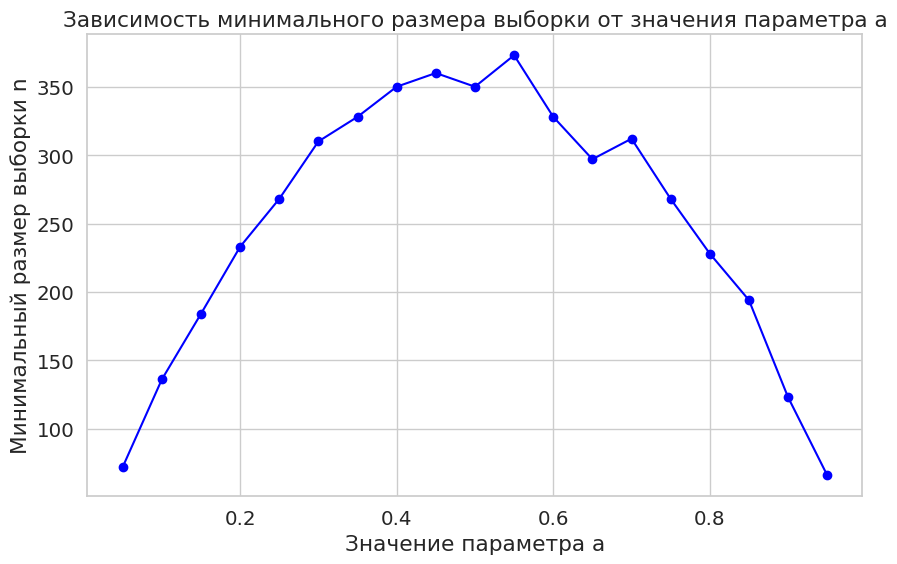

In [54]:
# Значения параметра a от 0.05 до 0.95 с шагом 0.05
a_values = np.arange(0.05, 1.0, 0.05)

# Функция для расчета минимального размера выборки n
def calculate_min_n(a, K, epsilon):
    # Генерируем массив возможных значений размера выборки n
    n_values = np.arange(1, 1000)  # Пример: ищем минимальный n до 1000

    # Вычисляем значения F(n) для всех размеров выборки n
    F_values = np.array([calculate_F(n_val, K, a) for n_val in n_values])

    # Находим минимальное значение n, при котором F(n) <= epsilon
    min_n_index = np.argmax(F_values <= epsilon) + 1  # +1, чтобы получить фактический размер выборки

    if min_n_index == len(n_values) + 1:
        # Если не удалось найти подходящий размер выборки до максимального значения
        min_n = None
    else:
        min_n = min_n_index

    return min_n

# Массив для хранения минимальных размеров выборки n для каждого значения a
min_n_values = []

# Перебор значений параметра a
for a in a_values:
    # Вычисление минимального размера выборки n для текущего значения a
    min_n = calculate_min_n(a, K, epsilon)
    min_n_values.append(min_n)
    
# Визуализация зависимости min_n от a
plt.figure(figsize=(10, 6))
plt.plot(a_values, min_n_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Значение параметра a')
plt.ylabel('Минимальный размер выборки n')
plt.title('Зависимость минимального размера выборки от значения параметра a')
plt.grid(True)
plt.show()

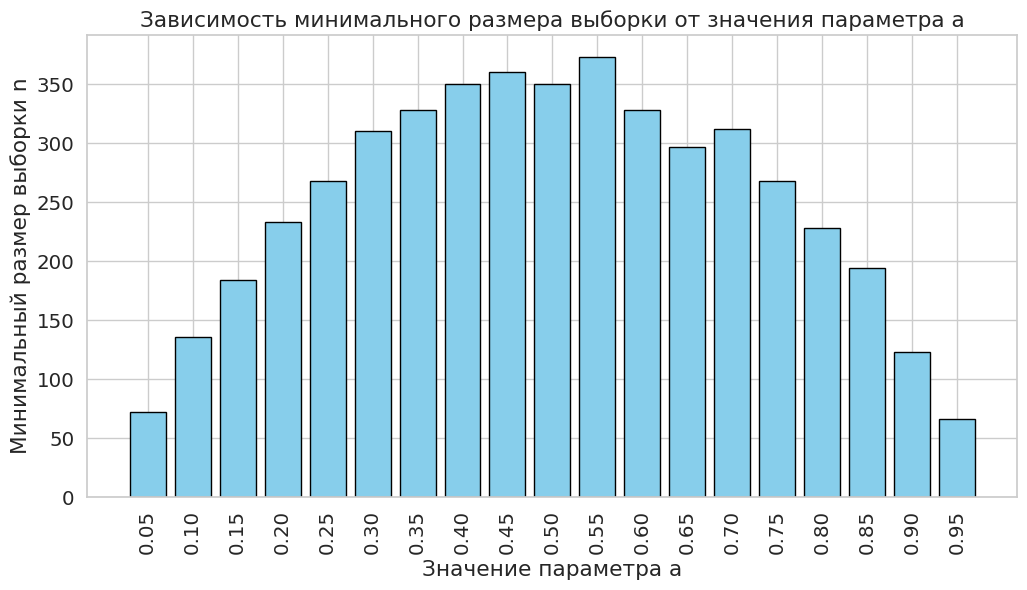

In [57]:
# Визуализация зависимости минимального размера выборки от a с помощью barplot
plt.figure(figsize=(12, 6))
plt.bar(a_values, min_n_values, width=0.04, color='skyblue', edgecolor='black')  # Создаем столбчатую диаграмму
plt.xlabel('Значение параметра a')
plt.ylabel('Минимальный размер выборки n')
plt.title('Зависимость минимального размера выборки от значения параметра a')
plt.grid(True)
plt.xticks(a_values, rotation=90)  # Поворачиваем метки по оси X для лучшей видимости

plt.show()

**Выводы:**

После выполнения эксперимента и визуализации зависимости минимального размера выборки n от значения параметра `a` для распределения Bern(`a`), можно сделать следующие выводы:
1. Зависимости между минимальным размером выбор и значнием параметра `а` очень похоже на нормальное распределение
2. Эти выводы могут быть полезны при планировании и проведении экспериментов или исследований, где необходимо оценить параметры распределения на основе выборки.

В общем и в целом, изучение зависимости минимального размера выборки от параметра `a` позволяет лучше понять влияние параметров распределения на требования к объему данных для получения надежной статистической оценки.